In [2]:
# In[1]:

import os
print("Current Working Directory is:",os.getcwd())
os.chdir("/content")
print("New Working Directory is:",os.getcwd())

Current Working Directory is: /content
New Working Directory is: /content


In [3]:
# In[2]:

import warnings
warnings.filterwarnings('ignore')

In [6]:
# In[3]:

!pip install dmba
get_ipython().run_line_magic('matplotlib', 'inline')

from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart

     |████████████████████████████████| 11.8 MB 895 kB/s 
no display found. Using non-interactive Agg backend


In [7]:
get_ipython().run_line_magic('matplotlib', 'inline')

from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart

In [9]:
# In[4]:

x=pd.read_csv('DP.csv')
x.tail(3)

,Sr.No,Companyname,Companytype,EmployeeID,Attrition,EmployeeAge,YearsAtCompany,Gender,location,EmployeeDepartment,...,Review,Careergrowth,Jobsecurity,Worklifebalance,SkillDevelopment,Companyculture,WorkSatisfaction,Salaryandbenefits,OverTime,Worktimingsatisfaction
647,647,Zoho,Product based,1640,Yes,32,1,Female,Chennai,Information Technology,...,Lot of politics which is worst,3.0,4.0,3.0,3.0,2.0,3.0,2.0,yes,Strict
648,649,Zoho,Product based,1642,No,21,2,Male,Chennai,Development,...,No job security. They can fire you anytime wit...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,No,Flexible
649,650,Zoho,Product based,1643,No,24,1,Male,Chennai,Information Technology,...,Never trust their employee and never giving an...,1.0,1.0,3.0,1.0,4.0,1.0,4.0,No,Flexible


In [10]:
# In[5]:

print("Number of Missing Values in Column:\n",x.isnull().sum())
print("Dimension of the Dataset is:",x.shape)

Number of Missing Values in Column:
 Sr.No                     0
Companyname               0
Companytype               0
EmployeeID                0
Attrition                 0
EmployeeAge               0
YearsAtCompany            0
Gender                    0
location                  0
EmployeeDepartment        0
JobRole                   0
Review                    3
Careergrowth              2
Jobsecurity               2
Worklifebalance           3
SkillDevelopment          2
Companyculture            1
WorkSatisfaction          1
Salaryandbenefits         1
OverTime                  0
Worktimingsatisfaction    0
dtype: int64
Dimension of the Dataset is: (650, 21)


In [11]:
# In[6]:

Newx = x.copy()
Newx.dropna(inplace=True)
print("Dimension of the Dataset is:",x.shape)
print("Number of Missing Values in Column:\n",Newx.isnull().sum())

Dimension of the Dataset is: (650, 21)
Number of Missing Values in Column:
 Sr.No                     0
Companyname               0
Companytype               0
EmployeeID                0
Attrition                 0
EmployeeAge               0
YearsAtCompany            0
Gender                    0
location                  0
EmployeeDepartment        0
JobRole                   0
Review                    0
Careergrowth              0
Jobsecurity               0
Worklifebalance           0
SkillDevelopment          0
Companyculture            0
WorkSatisfaction          0
Salaryandbenefits         0
OverTime                  0
Worktimingsatisfaction    0
dtype: int64


In [12]:
# In[7]:

x_df=pd.DataFrame(Newx)

In [13]:
# In[8]:

Newx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 649
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sr.No                   642 non-null    int64  
 1   Companyname             642 non-null    object 
 2   Companytype             642 non-null    object 
 3   EmployeeID              642 non-null    int64  
 4   Attrition               642 non-null    object 
 5   EmployeeAge             642 non-null    int64  
 6   YearsAtCompany          642 non-null    int64  
 7   Gender                  642 non-null    object 
 8   location                642 non-null    object 
 9   EmployeeDepartment      642 non-null    object 
 10  JobRole                 642 non-null    object 
 11  Review                  642 non-null    object 
 12  Careergrowth            642 non-null    float64
 13  Jobsecurity             642 non-null    float64
 14  Worklifebalance         642 non-null    fl

In [14]:
# In[9]:

x_df.drop(['Review'], axis=1, inplace = True)
x_df.drop(['EmployeeID'], axis=1, inplace = True)
x_df.drop(['Sr.No'],axis=1,inplace=True)

In [15]:
# In[10]:


x_df["Companyname"] = x_df["Companyname"].astype('category')
x_df["Companytype"] = x_df["Companytype"].astype('category')
x_df["Gender"] = x_df["Gender"].astype('category')
x_df["EmployeeDepartment"] = x_df["EmployeeDepartment"].astype('category')
x_df["JobRole"] = x_df["JobRole"].astype('category')
x_df["Attrition"] = x_df["Attrition"].astype('category')
x_df["location"] = x_df["location"].astype('category')
x_df["OverTime"] = x_df["OverTime"].astype('category')
x_df["Worktimingsatisfaction"] = x_df["Worktimingsatisfaction"].astype('category')

x_df.dtypes

Companyname               category
Companytype               category
Attrition                 category
EmployeeAge                  int64
YearsAtCompany               int64
Gender                    category
location                  category
EmployeeDepartment        category
JobRole                   category
Careergrowth               float64
Jobsecurity                float64
Worklifebalance            float64
SkillDevelopment           float64
Companyculture             float64
WorkSatisfaction           float64
Salaryandbenefits          float64
OverTime                  category
Worktimingsatisfaction    category
dtype: object

In [16]:
# In[11]:


x_df.drop_duplicates()

,Companyname,Companytype,Attrition,EmployeeAge,YearsAtCompany,Gender,location,EmployeeDepartment,JobRole,Careergrowth,Jobsecurity,Worklifebalance,SkillDevelopment,Companyculture,WorkSatisfaction,Salaryandbenefits,OverTime,Worktimingsatisfaction
0,Accenture,Product based,Yes,25,2,Female,Mumbai,Information Technology,Associate Software Developer,4.0,4.0,4.0,4.0,4.0,4.0,1.0,yes,Strict
1,Accenture,Product based,No,56,4,Female,Pune,Information Technology,Software Developer,5.0,5.0,5.0,4.0,5.0,4.0,2.0,No,Flexible
2,Accenture,Product based,Yes,24,1,Male,Mumbai,Database Administration,QA Analyst,3.0,3.0,3.0,2.0,3.0,2.0,3.0,yes,Strict
3,Accenture,Product based,No,23,8,Female,Pune,Finance Sector,Business Operation Associate,1.0,1.0,1.0,2.0,2.0,1.0,1.0,yes,Strict
5,Accenture,Product based,No,25,7,Female,Bangalore,LIfe Science,Application Development Senior Analyst,5.0,4.0,5.0,4.0,5.0,4.0,2.0,No,Flexible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Zoho,Product based,No,28,1,Male,Chennai,Engineering,Member Of Technical Staff,4.0,5.0,5.0,3.0,4.0,5.0,2.0,No,Flexible
646,Zoho,Product based,No,34,2,Male,Chennai,Engineering,Ios Developer,2.0,4.0,4.0,3.0,3.0,2.0,2.0,No,Flexible
647,Zoho,Product based,Yes,32,1,Female,Chennai,Information Technology,Member Leadership Staff,3.0,4.0,3.0,3.0,2.0,3.0,2.0,yes,Strict
648,Zoho,Product based,No,21,2,Male,Chennai,Development,Member Techinal Staff,1.0,1.0,1.0,1.0,1.0,1.0,1.0,No,Flexible


In [17]:
# In[13]:


s = x_df.Companyname
Counts = x_df.Companyname.value_counts()
Percentage = x_df.Companyname.value_counts(normalize=True)*100
pd.DataFrame({'Counts':Counts, 'Percentage':Percentage})

,Counts,Percentage
TCS,36,5.607477
HCL TechNologies,30,4.672897
Redington,28,4.361371
Amazon,27,4.205607
Cognizant,27,4.205607
Zomato,25,3.894081
Hexaware Technologies,25,3.894081
Mphasis,25,3.894081
Adobe,25,3.894081
Tech Mahindra,25,3.894081


In [18]:
# In[14]:


s = x_df.Gender
Counts = x_df.Gender.value_counts()
Percentage = x_df.Gender.value_counts(normalize=True)*100
pd.DataFrame({'Counts':Counts, 'Percentage':Percentage})

,Counts,Percentage
Male,418,65.109034
Female,224,34.890966


In [19]:
# In[15]:


s = x_df.EmployeeDepartment
Counts = x_df.EmployeeDepartment.value_counts()
Percentage = x_df.EmployeeDepartment.value_counts(normalize=True)*100
pd.DataFrame({'Counts':Counts, 'Percentage':Percentage})

,Counts,Percentage
Information Technology,248,38.629283
Finance Sector,76,11.838006
Operations,44,6.853583
Sales And Marketing,28,4.361371
Engineering,23,3.582555
Finance,23,3.582555
Health Care,21,3.271028
Finance Sector,19,2.959502
Marketing,17,2.647975
Software Testing,14,2.180685


In [20]:
# In[16]:


s = x_df.location
Counts = x_df.location.value_counts()
Percentage = x_df.location.value_counts(normalize=True)*100
pd.DataFrame({'Counts':Counts, 'Percentage':Percentage})

,Counts,Percentage
Bangalore,205,31.931464
Chennai,99,15.420561
Hyderabad,71,11.059190
Pune,67,10.436137
Noida,34,5.295950
Mumbai,31,4.828660
Gurgaon,29,4.517134
Kolkata,23,3.582555
Delhi,12,1.869159
Pune,9,1.401869


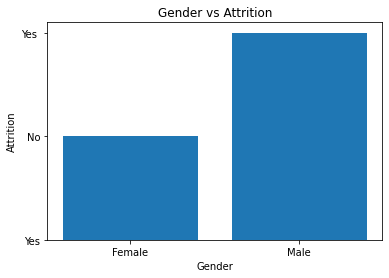

In [21]:
# In[17]:


name= x_df['Gender']
att=x_df['Attrition']
fig = plt.figure()
 
# Horizontal Bar Plot
plt.bar(name,att)
plt.title("Gender vs Attrition")
plt.ylabel("Attrition")
plt.xlabel("Gender")
# Show Plot
plt.show()

In [22]:
# In[18]:


x_df["Companyname"] = x_df["Companyname"].cat.codes
x_df["Companytype"] = x_df["Companytype"].cat.codes
x_df["Gender"] = x_df["Gender"].cat.codes
x_df["EmployeeDepartment"] = x_df["EmployeeDepartment"].cat.codes
x_df["JobRole"] = x_df["JobRole"].cat.codes
x_df["Attrition"] = x_df["Attrition"].cat.codes
x_df["location"] = x_df["location"].cat.codes
x_df["OverTime"] = x_df["OverTime"].cat.codes
x_df["Worktimingsatisfaction"] = x_df["Worktimingsatisfaction"].cat.codes

x_df.dtypes

Companyname                  int8
Companytype                  int8
Attrition                    int8
EmployeeAge                 int64
YearsAtCompany              int64
Gender                       int8
location                     int8
EmployeeDepartment           int8
JobRole                     int16
Careergrowth              float64
Jobsecurity               float64
Worklifebalance           float64
SkillDevelopment          float64
Companyculture            float64
WorkSatisfaction          float64
Salaryandbenefits         float64
OverTime                     int8
Worktimingsatisfaction       int8
dtype: object

In [23]:
# In[19]:


x_df.corr()

,Companyname,Companytype,Attrition,EmployeeAge,YearsAtCompany,Gender,location,EmployeeDepartment,JobRole,Careergrowth,Jobsecurity,Worklifebalance,SkillDevelopment,Companyculture,WorkSatisfaction,Salaryandbenefits,OverTime,Worktimingsatisfaction
Companyname,1.000000,0.095130,-0.029434,0.083665,-0.046488,0.030700,-0.172207,-0.020848,-0.069852,0.075059,0.022043,0.115239,0.096768,0.086079,0.114641,0.114687,-0.004580,-0.046467
Companytype,0.095130,1.000000,-0.019232,0.052405,0.093265,-0.019747,0.236328,0.005136,0.031200,-0.078386,-0.100164,-0.111638,-0.032625,-0.176483,-0.205902,-0.255708,-0.058105,0.095359
Attrition,-0.029434,-0.019232,1.000000,-0.044371,-0.079505,0.060143,-0.025430,-0.005153,0.042859,-0.037852,-0.004798,-0.030532,-0.041777,-0.076075,-0.052194,-0.038413,0.697171,0.761845
EmployeeAge,0.083665,0.052405,-0.044371,1.000000,0.416760,-0.043217,0.003112,0.022109,-0.045142,0.049222,0.065145,0.012840,0.045710,0.000966,0.072497,0.087366,-0.002876,-0.061100
YearsAtCompany,-0.046488,0.093265,-0.079505,0.416760,1.000000,-0.083533,0.079837,0.061939,-0.062563,0.086766,0.046092,0.031262,-0.014086,-0.080907,0.001632,0.018692,-0.056266,-0.020711
Gender,0.030700,-0.019747,0.060143,-0.043217,-0.083533,1.000000,0.020845,-0.039115,-0.071042,-0.104616,-0.097425,-0.051623,-0.087215,-0.073341,-0.046222,-0.008873,0.039490,0.010068
location,-0.172207,0.236328,-0.025430,0.003112,0.079837,0.020845,1.000000,-0.016882,0.000321,-0.013650,-0.025626,-0.088935,-0.004052,-0.046656,-0.040209,-0.076475,-0.037815,0.037623
EmployeeDepartment,-0.020848,0.005136,-0.005153,0.022109,0.061939,-0.039115,-0.016882,1.000000,0.100945,0.018797,-0.043259,-0.084609,-0.022432,-0.003094,-0.011613,-0.017951,-0.017788,0.091375
JobRole,-0.069852,0.031200,0.042859,-0.045142,-0.062563,-0.071042,0.000321,0.100945,1.000000,0.050093,0.013696,0.025027,0.015696,-0.016357,-0.044566,-0.036970,0.022862,0.032863
Careergrowth,0.075059,-0.078386,-0.037852,0.049222,0.086766,-0.104616,-0.013650,0.018797,0.050093,1.000000,0.625810,0.620088,0.745163,0.657563,0.703875,0.570424,-0.044326,-0.044814


In [24]:
# In[20]:


import matplotlib.pyplot as plt
import seaborn as sn
get_ipython().run_line_magic('matplotlib', 'inline')
influential_features = ['Gender', 'JobRole', 'OverTime', 'Worktimingsatisfaction', 'Attrition']
x_df[influential_features].corr()

,Gender,JobRole,OverTime,Worktimingsatisfaction,Attrition
Gender,1.000000,-0.071042,0.039490,0.010068,0.060143
JobRole,-0.071042,1.000000,0.022862,0.032863,0.042859
OverTime,0.039490,0.022862,1.000000,0.547706,0.697171
Worktimingsatisfaction,0.010068,0.032863,0.547706,1.000000,0.761845
Attrition,0.060143,0.042859,0.697171,0.761845,1.000000


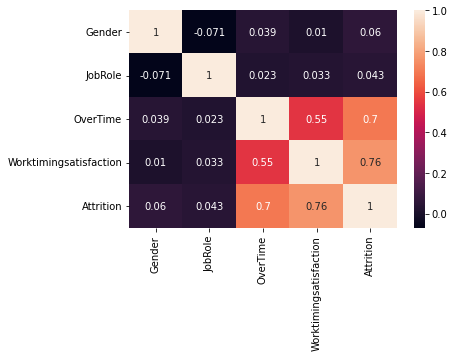

In [25]:
# In[21]:


sn.heatmap(x_df[influential_features].corr(), annot=True)

In [26]:
# In[22]:


x_df.corr()

,Companyname,Companytype,Attrition,EmployeeAge,YearsAtCompany,Gender,location,EmployeeDepartment,JobRole,Careergrowth,Jobsecurity,Worklifebalance,SkillDevelopment,Companyculture,WorkSatisfaction,Salaryandbenefits,OverTime,Worktimingsatisfaction
Companyname,1.000000,0.095130,-0.029434,0.083665,-0.046488,0.030700,-0.172207,-0.020848,-0.069852,0.075059,0.022043,0.115239,0.096768,0.086079,0.114641,0.114687,-0.004580,-0.046467
Companytype,0.095130,1.000000,-0.019232,0.052405,0.093265,-0.019747,0.236328,0.005136,0.031200,-0.078386,-0.100164,-0.111638,-0.032625,-0.176483,-0.205902,-0.255708,-0.058105,0.095359
Attrition,-0.029434,-0.019232,1.000000,-0.044371,-0.079505,0.060143,-0.025430,-0.005153,0.042859,-0.037852,-0.004798,-0.030532,-0.041777,-0.076075,-0.052194,-0.038413,0.697171,0.761845
EmployeeAge,0.083665,0.052405,-0.044371,1.000000,0.416760,-0.043217,0.003112,0.022109,-0.045142,0.049222,0.065145,0.012840,0.045710,0.000966,0.072497,0.087366,-0.002876,-0.061100
YearsAtCompany,-0.046488,0.093265,-0.079505,0.416760,1.000000,-0.083533,0.079837,0.061939,-0.062563,0.086766,0.046092,0.031262,-0.014086,-0.080907,0.001632,0.018692,-0.056266,-0.020711
Gender,0.030700,-0.019747,0.060143,-0.043217,-0.083533,1.000000,0.020845,-0.039115,-0.071042,-0.104616,-0.097425,-0.051623,-0.087215,-0.073341,-0.046222,-0.008873,0.039490,0.010068
location,-0.172207,0.236328,-0.025430,0.003112,0.079837,0.020845,1.000000,-0.016882,0.000321,-0.013650,-0.025626,-0.088935,-0.004052,-0.046656,-0.040209,-0.076475,-0.037815,0.037623
EmployeeDepartment,-0.020848,0.005136,-0.005153,0.022109,0.061939,-0.039115,-0.016882,1.000000,0.100945,0.018797,-0.043259,-0.084609,-0.022432,-0.003094,-0.011613,-0.017951,-0.017788,0.091375
JobRole,-0.069852,0.031200,0.042859,-0.045142,-0.062563,-0.071042,0.000321,0.100945,1.000000,0.050093,0.013696,0.025027,0.015696,-0.016357,-0.044566,-0.036970,0.022862,0.032863
Careergrowth,0.075059,-0.078386,-0.037852,0.049222,0.086766,-0.104616,-0.013650,0.018797,0.050093,1.000000,0.625810,0.620088,0.745163,0.657563,0.703875,0.570424,-0.044326,-0.044814


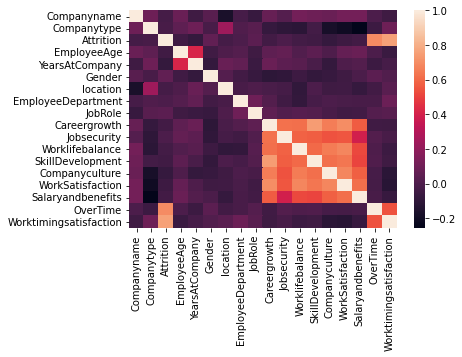

In [27]:
# In[23]:


sn.heatmap(x_df.corr(),annot=False)

In [28]:
# In[24]:


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [29]:
# In[25]:


import sys
get_ipython().system('{sys.executable} -m pip install pydotplus')

In [30]:
# # Random forest
# 

# In[38]:


y = x_df[influential_features]['Attrition']
X = x_df[influential_features].drop(columns=['Attrition'])

In [31]:
# In[27]:




y = x_df['Attrition']
X = x_df.drop(columns=['Attrition'])
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

                   feature  importance       std
4                   Gender    0.007561  0.009852
8             Careergrowth    0.014403  0.013654
14       Salaryandbenefits    0.016002  0.014719
9              Jobsecurity    0.016472  0.015169
10         Worklifebalance    0.016507  0.016450
13        WorkSatisfaction    0.016660  0.015357
12          Companyculture    0.018441  0.015352
1              Companytype    0.019535  0.018077
11        SkillDevelopment    0.020375  0.017960
3           YearsAtCompany    0.022673  0.017959
5                 location    0.024571  0.021641
6       EmployeeDepartment    0.030490  0.020076
7                  JobRole    0.037522  0.027225
0              Companyname    0.041226  0.026121
2              EmployeeAge    0.070076  0.054635
15                OverTime    0.213593  0.182826
16  Worktimingsatisfaction    0.413893  0.220743


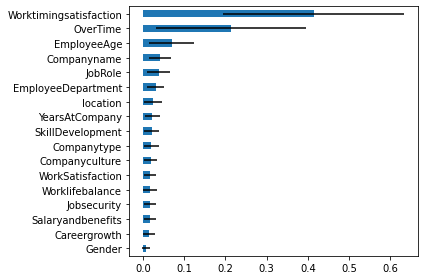

In [32]:
# In[28]:


importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [35]:
# In[56]:


# Predict on the test set results

y_pred = rf.predict(valid_X)
# Check accuracy score 

print('Random forest Model accuracy score  : {0:0.4f}'. format(accuracy_score(valid_y, y_pred)))
from sklearn.metrics import classification_report

print(classification_report(valid_y, y_pred))
cm = confusion_matrix(valid_y, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Random forest Model accuracy score  : 0.9144
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       164
           1       0.86      0.91      0.88        92
           2       0.00      0.00      0.00         1

    accuracy                           0.91       257
   macro avg       0.60      0.61      0.61       257
weighted avg       0.91      0.91      0.91       257

Classification accuracy : 0.9180
Classification error : 0.0820
Precision : 0.9207
Recall or Sensitivity : 0.9497
True Positive Rate : 0.9497
False Positive Rate : 0.1340
Specificity : 0.8660


In [42]:
!pip install mord

  Created wheel for mord: filename=mord-0.6-py3-none-any.whl size=6006 sha256=ad94b65395e8e115bb11b85c877d6d32a4192bf68d1b739f6d96e23b3b9da0c6
  Stored in directory: /root/.cache/pip/wheels/80/1d/8a/bef1a01b6a3c91494905d161d5426c181819f9730a773141eb
Successfully built mord


In [43]:
# # Logistic regression

# In[41]:


get_ipython().run_line_magic('matplotlib', 'inline')

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

y = x_df['Attrition']
X = x_df.drop(columns=['Attrition'])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.4741454454300886
       Companyname  Companytype  EmployeeAge  YearsAtCompany    Gender  \
coeff     0.003707     0.336839     0.018589        0.031993 -0.478276   

       location  EmployeeDepartment   JobRole  Careergrowth  Jobsecurity  \
coeff  0.002375            0.095651  0.000581     -0.290459     0.057195   

       Worklifebalance  SkillDevelopment  Companyculture  WorkSatisfaction  \
coeff         0.341648          0.412957        0.261297         -0.571392   

       Salaryandbenefits  OverTime  Worktimingsatisfaction  
coeff          -0.159425 -4.294799               -2.802182  

AIC 282.75719530444945


In [44]:
# In[47]:


classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))
y_pred=logit_reg.predict(valid_X)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(valid_y, y_pred)
cnf_matrix
from sklearn.metrics import classification_report

print(classification_report(valid_y, y_pred))
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(valid_y, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Confusion Matrix (Accuracy 0.9403)

       Prediction
Actual   0   1   2
     0 228  12   0
     1  11 132   0
     2   0   0   2
Confusion Matrix (Accuracy 0.8716)

       Prediction
Actual   0   1   2
     0 147  15   2
     1  10  76   6
     2   0   0   1
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       164
           1       0.84      0.83      0.83        92
           2       0.11      1.00      0.20         1

    accuracy                           0.87       257
   macro avg       0.63      0.91      0.65       257
weighted avg       0.90      0.87      0.88       257

Classification accuracy : 0.8992
Classification error : 0.1008
Precision : 0.9074
Recall or Sensitivity : 0.9363
True Positive Rate : 0.9363
False Positive Rate : 0.1648
Specificity : 0.8352


In [45]:
# # Naive bayes
# 

# In[43]:


predictors = ['Worktimingsatisfaction', 'OverTime', 'EmployeeAge', 'Companyname', 'Companytype', 'YearsAtCompany', 'Gender', 'JobRole', 'Careergrowth', 'Jobsecurity', 'Worklifebalance', 'SkillDevelopment', 'Companyculture', 'WorkSatisfaction', 'Salaryandbenefits','OverTime' ]
outcome = 'Attrition'

X = pd.get_dummies(x_df[predictors])
y = x_df['Attrition']


# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

# run naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

# predict probabilities
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)

# predict class membership
y_valid_pred = delays_nb.predict(X_valid)
y_train_pred = delays_nb.predict(X_train)
from sklearn.metrics import accuracy_score

print('Naive bayes Model accuracy score: {0:0.4f}'. format(accuracy_score(y_valid, y_valid_pred)))
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_valid_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_valid_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Naive bayes Model accuracy score: 0.8366
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       164
           1       0.77      0.78      0.77        92
           2       0.00      0.00      0.00         1

    accuracy                           0.84       257
   macro avg       0.56      0.55      0.56       257
weighted avg       0.86      0.84      0.85       257

Classification accuracy : 0.8635
Classification error : 0.1365
Precision : 0.8720
Recall or Sensitivity : 0.9167
True Positive Rate : 0.9167
False Positive Rate : 0.2258
Specificity : 0.7742


In [46]:
# # SVM

# In[37]:


from sklearn.svm import SVC
y = x_df['Attrition']
X = x_df.drop(columns=['Attrition'])

# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.60, random_state=0)
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=poly_svc.predict(X_valid)

# compute and print accuracy score
print('SVM Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred))
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

SVM Model accuracy score with polynomial kernel and C=1.0 : 0.6010
              precision    recall  f1-score   support

           0       0.64      0.87      0.74       250
           1       0.30      0.10      0.16       134
           2       0.00      0.00      0.00         2

    accuracy                           0.60       386
   macro avg       0.32      0.33      0.30       386
weighted avg       0.52      0.60      0.53       386

Classification accuracy : 0.6042
Classification error : 0.3958
Precision : 0.8720
Recall or Sensitivity : 0.6450
True Positive Rate : 0.6450
False Positive Rate : 0.6957
Specificity : 0.3043


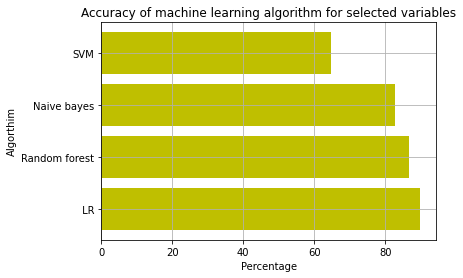

In [47]:
# In[67]:


import numpy as np
import matplotlib.pyplot as plt
location ={ ' LR': 89.84, 'Random forest':86.77, 'Naive bayes':82.88,'SVM':64.77}
names=list(location.keys()) # extracting keys from student and stored as list in name
values=list(location.values()) 
plt.barh(names,values,color='y') # Bar method is used for barplot. First parameter is c
plt.title("Accuracy of machine learning algorithm for selected variables")
plt.ylabel("Algorthim")
plt.xlabel("Percentage")
plt.grid(True)
plt.show()

In [48]:
# # Selected variables

# # Random forest for selected variables

# In[59]:


y = x_df[influential_features]['Attrition']
X = x_df[influential_features].drop(columns=['Attrition'])
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)
# Predict on the test set results

y_pred = rf.predict(valid_X)
# Check accuracy score 

print('Random forest Model accuracy score  : {0:0.4f}'. format(accuracy_score(valid_y, y_pred)))
from sklearn.metrics import classification_report

print(classification_report(valid_y, y_pred))
cm = confusion_matrix(valid_y, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Random forest Model accuracy score  : 0.8677
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       164
           1       0.80      0.85      0.82        92
           2       0.00      0.00      0.00         1

    accuracy                           0.87       257
   macro avg       0.57      0.58      0.57       257
weighted avg       0.87      0.87      0.87       257

Classification accuracy : 0.8780
Classification error : 0.1220
Precision : 0.8841
Recall or Sensitivity : 0.9236
True Positive Rate : 0.9236
False Positive Rate : 0.1959
Specificity : 0.8041


In [49]:
# # Logistic regression

# In[61]:


get_ipython().run_line_magic('matplotlib', 'inline')

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

y = x_df[influential_features]['Attrition']
X = x_df[influential_features].drop(columns=['Attrition'])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))
y_pred=logit_reg.predict(valid_X)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(valid_y, y_pred)
cnf_matrix
from sklearn.metrics import classification_report

print(classification_report(valid_y, y_pred))
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(valid_y, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

intercept  4.172755552422579
         Gender   JobRole  OverTime  Worktimingsatisfaction
coeff -0.481728  0.001003 -3.819965               -2.357143

AIC 162.2519268122429
Confusion Matrix (Accuracy 0.9169)

       Prediction
Actual   0   1   2
     0 220  20   0
     1  10 133   0
     2   0   2   0
Confusion Matrix (Accuracy 0.8949)

       Prediction
Actual   0   1   2
     0 143  21   0
     1   5  87   0
     2   0   1   0
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       164
           1       0.80      0.95      0.87        92
           2       0.00      0.00      0.00         1

    accuracy                           0.89       257
   macro avg       0.59      0.61      0.59       257
weighted avg       0.90      0.89      0.89       257

Classification accuracy : 0.8984
Classification error : 0.1016
Precision : 0.8720
Recall or Sensitivity : 0.9662
True Positive Rate : 0.9662
False Positive Rate : 0.1944
Specificity : 0.8

In [50]:
# # SVM

# In[62]:


from sklearn.svm import SVC
y = x_df[influential_features]['Attrition']
X = x_df[influential_features].drop(columns=['Attrition'])

# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.60, random_state=0)
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=poly_svc.predict(X_valid)

# compute and print accuracy score
print('SVM Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred))
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

SVM Model accuracy score with polynomial kernel and C=1.0 : 0.6477
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       250
           1       0.00      0.00      0.00       134
           2       0.00      0.00      0.00         2

    accuracy                           0.65       386
   macro avg       0.22      0.33      0.26       386
weighted avg       0.42      0.65      0.51       386

Classification accuracy : 0.6510
Classification error : 0.3490
Precision : 1.0000
Recall or Sensitivity : 0.6510
True Positive Rate : 0.6510
False Positive Rate : nan
Specificity : nan


In [51]:
# # Naive bayes

# In[64]:


predictors = ['Worktimingsatisfaction', 'OverTime', 'Gender', 'JobRole' ]
outcome = 'Attrition'

X = pd.get_dummies(x_df[predictors])
y = x_df['Attrition']


# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

# run naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

# predict probabilities
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)

# predict class membership
y_valid_pred = delays_nb.predict(X_valid)
y_train_pred = delays_nb.predict(X_train)
from sklearn.metrics import accuracy_score

print('Naive bayes Model accuracy score: {0:0.4f}'. format(accuracy_score(y_valid, y_valid_pred)))
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_valid_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_valid_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Naive bayes Model accuracy score: 0.8288
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       164
           1       0.73      0.84      0.78        92
           2       0.00      0.00      0.00         1

    accuracy                           0.83       257
   macro avg       0.54      0.56      0.55       257
weighted avg       0.83      0.83      0.83       257

Classification accuracy : 0.8320
Classification error : 0.1680
Precision : 0.8293
Recall or Sensitivity : 0.9007
True Positive Rate : 0.9007
False Positive Rate : 0.2667
Specificity : 0.7333


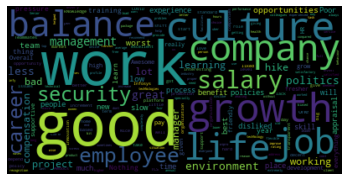

In [53]:
# # Word cloud for review

# In[82]:


import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df = pd.read_csv("review.csv")
df
text1 = " ".join(review for review in df.Review)

wc1 = WordCloud(collocations = False, background_color = 'black').generate(text1)
# saving the image
wc1.to_file('got.png')
# Display the generated Word Cloud

plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.show()